## GRUPO 2

In [1]:
#PCA
from sklearn.decomposition import PCA
# Tensorflow
import tensorflow as tf
from tensorflow import keras

#Genericas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import standardize
import math
import cv2

## Limpieza del dataset

Carga de dataset de imagenes y dataset de nombres

In [2]:
X = np.load('AUSTRAL_MCD_FACE_v2.npy')
y = np.load('AUSTRAL_MCD_FACE_TARGET_v2.npy')
print(X.shape)
print(y.shape)

(341, 150, 150)
(341,)


Persona|Aparece|Observaciones
--- | ---|---
Andres | 22 |---
Carla | 21 |Borrar
Claudia | 12 |---
Edu | 27 |---
Elemir | 12 |---
Fernanda | 20 |---
Geronimo | 11 |---
Hernan | 18 |---
Jiang | 19 |---
Joaquin | 10 |---
Josefina | 12 |---
Julieta | 12 |---
Lujan | 10 |---
Mai | 15 |---
Marcelo G | 10 |---
Marcelo T | 16 |---
Maribel | 10 |---
Marisa | 10 |---
Nestor | 10 |---
Oscar | 10 |---
Ramon | 10 |---
Rodrigo E | 9 |---
Rodrigo E.jpg | 1 |Borrar
Rodrigo G | 11 |Borrar
Sebastian | 14 |---
Silvia | 9 |La que menos aparece

Se eliminan alumnos que ya no cursan la maestria

In [3]:
X = np.delete(X, np.where(y == 'Rodrigo E.jpg'), 0)
y = np.delete(y, np.where(y == 'Rodrigo E.jpg'), 0)

X = np.delete(X, np.where(y == 'Rodrigo G'), 0)
y = np.delete(y, np.where(y == 'Rodrigo G'), 0)

X = np.delete(X, np.where(y == 'Carla'), 0)
y = np.delete(y, np.where(y == 'Carla'), 0)

nombres_y=y
nombres_y

array(['Marcelo T', 'Andres', 'Marcelo T', 'Edu', 'Fernanda', 'Lujan',
       'Nestor', 'Elemir', 'Edu', 'Edu', 'Edu', 'Sebastian', 'Oscar',
       'Joaquin', 'Claudia', 'Joaquin', 'Oscar', 'Sebastian', 'Jiang',
       'Marcelo T', 'Elemir', 'Andres', 'Fernanda', 'Josefina',
       'Marcelo T', 'Elemir', 'Marcelo G', 'Jiang', 'Rodrigo E',
       'Josefina', 'Fernanda', 'Oscar', 'Geronimo', 'Claudia', 'Edu',
       'Geronimo', 'Oscar', 'Fernanda', 'Mai', 'Rodrigo E', 'Jiang',
       'Joaquin', 'Fernanda', 'Hernan', 'Julieta', 'Silvia', 'Edu',
       'Silvia', 'Mai', 'Andres', 'Lujan', 'Claudia', 'Hernan',
       'Fernanda', 'Jiang', 'Joaquin', 'Marcelo T', 'Edu', 'Maribel',
       'Marisa', 'Maribel', 'Fernanda', 'Claudia', 'Mai', 'Rodrigo E',
       'Fernanda', 'Edu', 'Sebastian', 'Maribel', 'Josefina', 'Oscar',
       'Mai', 'Julieta', 'Sebastian', 'Maribel', 'Marisa', 'Andres',
       'Josefina', 'Josefina', 'Elemir', 'Elemir', 'Julieta', 'Julieta',
       'Claudia', 'Ramon', 'Marisa

Obtener los nombres únicos en el arreglo y número de registros a recopilar por cada nombre


In [4]:
nombres_unicos = np.unique(y)  

registros_por_nombre = 10

resultados = []
resultados2 = []

for nombre in nombres_unicos:
    indices = np.where(y == nombre)[0][:registros_por_nombre]
    registros = y[indices]
    registros2 = X[indices]
    resultados.extend(registros)
    resultados2.extend(registros2)

resultados = np.array(resultados)
y = resultados
X = np.array(resultados2)

In [5]:
print(y.shape)
print(X.shape)

(228,)
(228, 150, 150)


In [6]:
# Lista de nombres
nombres = np.unique(y)

# Crear un diccionario para mapear cada nombre a un valor numérico
mapeo_nombres = {nombre: i for i, nombre in enumerate(np.unique(nombres))}

# Crear una matriz de valores numéricos codificados
nombres_codificados = np.array([mapeo_nombres[nombre] for nombre in nombres])

y = np.searchsorted(nombres, y)

In [7]:
# Lista de nombres
nombres = np.unique(y)
nombres

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int64)

In [8]:
# Crear un diccionario para mapear cada nombre a un valor numérico
mapeo_nombres = {nombre: i for i, nombre in enumerate(np.unique(nombres))}
mapeo_nombres

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22}

In [9]:
# Crear una matriz de valores numéricos codificados
nombres_codificados = np.array([mapeo_nombres[nombre] for nombre in nombres])
nombres_codificados

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [10]:
y = np.searchsorted(nombres, y)
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22,
       22, 22, 22, 22, 22

Armamos set de entrenamiento y test

In [11]:
percentage = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=percentage, random_state=42)
targets = y.reshape(-1, 1)

In [12]:
X_train.shape, Y_train.shape

((159, 150, 150), (159,))

In [13]:
X_test.shape, Y_test.shape

((69, 150, 150), (69,))

Imprime los valores únicos y las cantidades de repeticiones del set de entrenamiento

In [14]:
unique, counts = np.unique(Y_train, return_counts=True)
print("Persona|Aparece|")
print("--- | ---|---") 
for i in range(len(unique)):
    print("{} | {} |---".format(unique[i], counts[i]))

Persona|Aparece|
--- | ---|---
0 | 7 |---
1 | 7 |---
2 | 7 |---
3 | 7 |---
4 | 7 |---
5 | 7 |---
6 | 7 |---
7 | 7 |---
8 | 7 |---
9 | 7 |---
10 | 7 |---
11 | 7 |---
12 | 7 |---
13 | 7 |---
14 | 7 |---
15 | 7 |---
16 | 7 |---
17 | 7 |---
18 | 7 |---
19 | 7 |---
20 | 6 |---
21 | 7 |---
22 | 6 |---


Imprime los valores únicos y las cantidades de repeticiones del set de test

In [15]:
unique, counts = np.unique(Y_test, return_counts=True)
print("Persona|Aparece|")
print("--- | ---|---") 
for i in range(len(unique)):
    print("{} | {} |---".format(unique[i], counts[i]))

Persona|Aparece|
--- | ---|---
0 | 3 |---
1 | 3 |---
2 | 3 |---
3 | 3 |---
4 | 3 |---
5 | 3 |---
6 | 3 |---
7 | 3 |---
8 | 3 |---
9 | 3 |---
10 | 3 |---
11 | 3 |---
12 | 3 |---
13 | 3 |---
14 | 3 |---
15 | 3 |---
16 | 3 |---
17 | 3 |---
18 | 3 |---
19 | 3 |---
20 | 3 |---
21 | 3 |---
22 | 3 |---


# 1.PCA

Vemos las componentes del conjunto en test y train.

In [16]:
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)
print("Numero de target", len(np.unique(y)))

print("\nEtiquetas distintas en cada target")
print("Y_train shape", len(np.unique(Y_train)))
print("Y_test shape", len(np.unique(Y_test)))


X_train shape (159, 150, 150)
Y_train shape (159,)
X_test shape (69, 150, 150)
Y_test shape (69,)
Numero de target 23

Etiquetas distintas en cada target
Y_train shape 23
Y_test shape 23


Graficamos algunos ejemplos del conjunto dado del set de entrenamiento

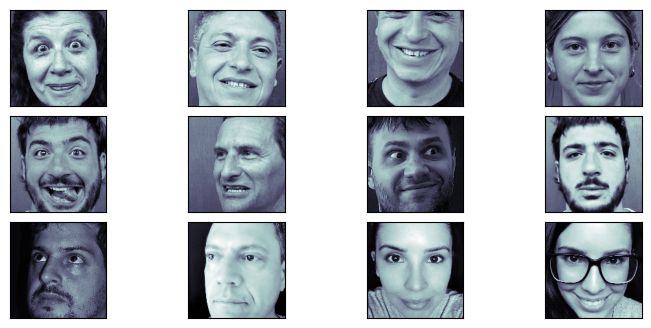

In [17]:
# show dataset.
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='bone')

Hago un reshaping para poder hacer el PCA

In [18]:
# Reshaping the dataset
X_train = X_train.reshape(X_train.shape[0], 22500) 
X_test = X_test.reshape(X_test.shape[0], 22500)  

# Change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (159, 22500)
Testing matrix shape (69, 22500)


Estandarizamos para aplicar escala de grises

In [19]:
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

X_train = X_train/255.0
X_test = X_test/255.0

print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0.0 255.0
0.0 255.0
0.0 1.0
0.0 1.0


Aplicamos PCA para 90% de la variabilidad de los datos

In [20]:
pca = PCA(n_components=.90, svd_solver = 'full')
pca.fit(X_train)

PCA(n_components=0.9, svd_solver='full')

Cantidad de componentes principales que explican una variabilidad del 90 %

In [21]:
pca.n_components_

64

In [22]:
# Calcula la variancia acumulada
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>90)
print("Componentes variancia 90%: "+ str(k+1))

Componentes variancia 90%: 64


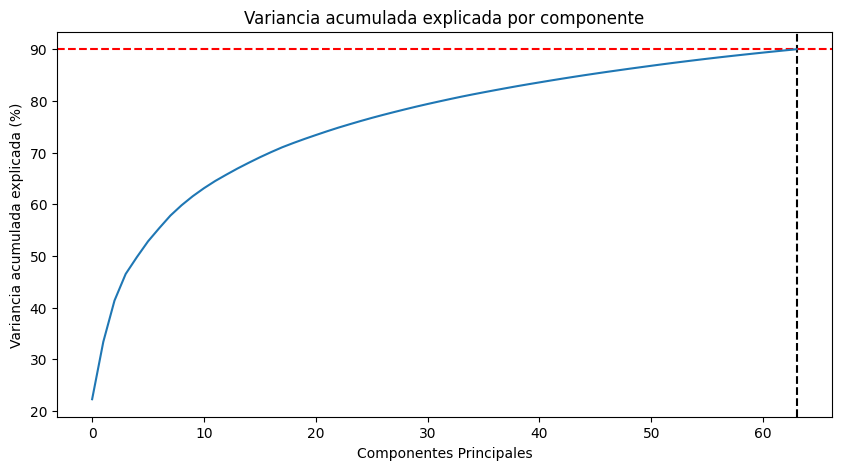

In [23]:
# Grafica Variancia Acumulada
plt.figure(figsize=[10,5])
plt.title('Variancia acumulada explicada por componente')
plt.ylabel('Variancia acumulada explicada (%)')
plt.xlabel('Componentes Principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

Aplicamos PCA para ambos sets (entrenamiento y test)

In [24]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

print(f'train_img shape : {train_img.shape}')
print(f'test_img shape : {test_img.shape}')

train_img shape : (159, 64)
test_img shape : (69, 64)


Las etiquetas de `Y_train` y `Y_test` son números entre 0 y 24.

Convertimos las etiquetas de clase a la codificación 1-de-K. Para ello utilizamos la función `keras.utils.to_categorical` (similar al  `OneHotEncoder` de `sklearn`).


In [25]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
Y_train_ohe = encoder.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_test_ohe = encoder.fit_transform(Y_test.reshape(-1, 1)).toarray()

print(Y_train_ohe[:3], Y_train[:3])
print(Y_test_ohe[:3], Y_test[:3])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [1 6 6]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [11 10 12]


# 2.Creación de la red neuronal 

In [26]:
def func_eval(fname, x):
    match fname:
        case "purelin":
            y = x
        case "logsig":
            y = 1.0 / ( 1.0 + math.exp(-x) )
        case "tansig":
            y = 2.0 / ( 1.0 + math.exp(-2.0*x) ) - 1.0
    return y

func_eval_vec = np.vectorize(func_eval)

def deriv_eval(fname, y):  #atencion que y es la entrada y=f( x )
    match fname:
        case "purelin":
            d = 1.0
        case "logsig":
            d = y*(1.0-y)
        case "tansig":
            d = 1.0 - y*y
    return d

deriv_eval_vec = np.vectorize(deriv_eval)

In [27]:
# Seteo el set de entrenamiento
X = train_img
Y = Y_train_ohe

Utilizamos 21 neuronas

In [29]:
#Parametros
filas_qty = len(X)
input_size = X.shape[1]   # 2 entradas
hidden_size = 21  # neuronas capa oculta
output_size = Y.shape[1]  # 1 neurona

Definimos las funciones de activacion logística para la capa oculta y la capa de salida

In [30]:
hidden_FUNC = 'logsig'  # uso la logistica
output_FUNC = 'logsig'  # uso la logistica

Incializamos las matrices de pesos azarosamente. W1 son los pesos que van del input a la capa oculta y W2 son los pesos que van de la capa oculta a la capa de salida

In [31]:
np.random.seed(1021) #mi querida random seed para que las corridas sean reproducibles
W1 = np.random.uniform(-0.5, 0.5, [hidden_size, input_size])
X01 = np.random.uniform(-0.5, 0.5, [hidden_size, 1] )
W2 = np.random.uniform(-0.5, 0.5, [output_size, hidden_size])
X02 = np.random.uniform(-0.5, 0.5, [output_size, 1] )

# Avanzo la red, forward
# para TODOS los X al mismo tiempo ! 
#  @ hace el producto de una matrix por un vector_columna
hidden_estimulos = W1 @ X.T + X01
hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
output_estimulos = W2 @ hidden_salidas + X02
output_salidas = func_eval_vec(output_FUNC, output_estimulos)

# calculo el error promedi general de TODOS los X
Error= np.mean( (Y.T - output_salidas)**2 )

In [32]:
# Inicializo
epoch_limit = 2000    
Error_umbral = 1.0e-06
learning_rate = 0.20
Error_last = 10   
epoch = 0

In [33]:
while (math.fabs(Error_last-Error)>Error_umbral and (epoch < epoch_limit)):
    epoch += 1
    Error_last = Error

    # recorro siempre TODA la entrada
    for fila in range(filas_qty): #para cada input x_sub_fila del vector X
        # propagar el x hacia adelante
        hidden_estimulos = W1 @ X[fila:fila+1, :].T + X01
        hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
        output_estimulos = W2 @ hidden_salidas + X02
        output_salidas = func_eval_vec(output_FUNC, output_estimulos)

        # calculo los errores en la capa hidden y la capa output
        ErrorSalida = Y[fila:fila+1,:].T - output_salidas
        # output_delta es un solo numero
        output_delta = ErrorSalida * deriv_eval_vec(output_FUNC, output_salidas)
        # hidden_delta es un vector columna
        hidden_delta = deriv_eval_vec(hidden_FUNC, hidden_salidas)*(W2.T @ output_delta)

        # ya tengo los errores que comete cada capa
        # corregir matrices de pesos, voy hacia atras
        # backpropagation
        W1 = W1 + learning_rate * (hidden_delta @ X[fila:fila+1, :] )
        X01 = X01 + learning_rate * hidden_delta
        W2 = W2 + learning_rate * (output_delta @ hidden_salidas.T)
        X02 = X02 + learning_rate * output_delta

    # ya recalcule las matrices de pesos
    # ahora avanzo la red, feed-forward
    hidden_estimulos = W1 @ X.T + X01
    hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
    output_estimulos = W2 @ hidden_salidas + X02
    output_salidas = func_eval_vec(output_FUNC, output_estimulos)

    # calculo el error promedio general de TODOS los X
    Error= np.mean( (Y.T - output_salidas)**2 )

## Evaluar el modelo

In [34]:
# Seteamos el dataset de prueba
X = test_img
Y = Y_test_ohe

In [35]:
# Recalculamos las filas de dataset de test
filas_qty = len(X)
resultados = []

# Recorremos todas las fotos del set de testing
cantidad_aciertos=0

for fila in range(filas_qty): #para cada input x_sub_fila del vector X
    # propagar el x hacia adelante
    hidden_estimulos = W1 @ X[fila:fila+1, :].T + X01
    hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
    output_estimulos = W2 @ hidden_salidas + X02
    output_salidas = func_eval_vec(output_FUNC, output_estimulos)

    # calculo los errores en la capa hidden y la capa output
    ErrorSalida = Y[fila:fila+1,:].T - output_salidas
   
    # Verificar si la predicción es correcta
    prediccion_correcta = nombres_unicos[np.argmax(Y[fila:fila+1,:].T)] == nombres_unicos[np.argmax(output_salidas)]
    
    # Agregar el resultado a la lista
    resultados.append({'Foto': fila+1,
                       'Clase Real': nombres_unicos[np.argmax(Y[fila:fila+1,:].T)],
                       'Clase Predicha': nombres_unicos[np.argmax(output_salidas)],
                       'Predicción Correcta': prediccion_correcta})
    
    if (np.argmax(Y[fila:fila+1,:].T)==np.argmax(output_salidas)):
        cantidad_aciertos += 1
        
       
# Crear la tabla con los resultados
tabla_resultados = pd.DataFrame(resultados)
pd.set_option('display.max_rows', None)
              
# Mostrar la tabla
print(tabla_resultados)

print("Cantidad de aciertos: ", cantidad_aciertos, "sobre un total de ",filas_qty, "fotos")
print("Accuracy: ", (cantidad_aciertos/filas_qty)*100)

    Foto Clase Real Clase Predicha  Predicción Correcta
0      1      Lujan          Lujan                 True
1      2    Julieta         Hernan                False
2      3        Mai         Hernan                False
3      4     Andres            Edu                False
4      5     Silvia      Sebastian                False
5      6     Elemir         Elemir                 True
6      7    Maribel       Fernanda                False
7      8     Marisa         Marisa                 True
8      9        Edu            Edu                 True
9     10    Joaquin        Joaquin                 True
10    11    Joaquin        Joaquin                 True
11    12  Marcelo G      Marcelo G                 True
12    13    Maribel        Maribel                 True
13    14  Marcelo T      Marcelo T                 True
14    15  Rodrigo E      Rodrigo E                 True
15    16      Oscar        Julieta                False
16    17     Nestor       Geronimo              